#**GLOBAL MISSING MIGRANTS**
DATA SOURCE: https://www.kaggle.com/datasets/nelgiriyewithana/global-missing-migrants-dataset/data

In [1]:
#Importing neccessary libraries
import numpy as np
import pandas as pd
import math
import folium
from folium import Marker
from folium.plugins import HeatMap, MarkerCluster
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the CSV file
dataset = pd.read_csv('/content/Global Missing Migrants Dataset.csv')
#Displaying the first 5 records in the datframe
dataset.head()

Incident Type  Incident year Reported Month               Region of Origin  \
0      Incident           2014        January                Central America   
1      Incident           2014        January  Latin America / Caribbean (P)   
2      Incident           2014        January  Latin America / Caribbean (P)   
3      Incident           2014        January                Central America   
4      Incident           2014        January                Northern Africa   

  Region of Incident Country of Origin  Number of Dead  \
0      North America         Guatemala             1.0   
1      North America           Unknown             1.0   
2      North America           Unknown             1.0   
3      North America            Mexico             1.0   
4             Europe             Sudan             1.0   

   Minimum Estimated Number of Missing  Total Number of Dead and Missing  \
0                                    0                                 1   
1                                    0                                 1   
2                                    0                                 1   
3                                    0                                 1   
4                                    0                                 1   

   Number of Survivors  Number of Females  Number of Males  \
0                    0                  0                1   
1                    0                  0                0   
2                    0                  0                0   
3                    0                  0                1   
4                    2                  0                1   

   Number of Children                                     Cause of Death  \
0                   0                                   Mixed or unknown   
1                   0                                   Mixed or unknown   
2                   0                                   Mixed or unknown   
3                   0                                           Violence   
4                   0  Harsh environmental conditions / lack of adequ...   

             Migration route  \
0  US-Mexico border crossing   
1  US-Mexico border crossing   
2  US-Mexico border crossing   
3  US-Mexico border crossing   
4                        NaN   

                                   Location of death  \
0  Pima Country Office of the Medical Examiner ju...   
1  Pima Country Office of the Medical Examiner ju...   
2  Pima Country Office of the Medical Examiner ju...   
3                         near Douglas, Arizona, USA   
4                  Border between Russia and Estonia   

                                  Information Source             Coordinates  \
0  Pima County Office of the Medical Examiner (PC...  31.650259, -110.366453   
1  Pima County Office of the Medical Examiner (PC...    31.59713, -111.73756   
2  Pima County Office of the Medical Examiner (PC...    31.94026, -113.01125   
3  Ministry of Foreign Affairs Mexico, Pima Count...  31.506777, -109.315632   
4                  EUBusiness (Agence France-Presse)             59.1551, 28   

  UNSD Geographical Grouping  
0           Northern America  
1           Northern America  
2           Northern America  
3           Northern America  
4            Northern Europe

In [3]:
#Checking the shape of the dataframe
dataset.shape

(13020, 19)

In [4]:
#Checking if the dataframe has any null values
dataset.isnull().sum()

Incident Type                             0
Incident year                             0
Reported Month                            0
Region of Origin                         22
Region of Incident                        0
Country of Origin                         8
Number of Dead                          550
Minimum Estimated Number of Missing       0
Total Number of Dead and Missing          0
Number of Survivors                       0
Number of Females                         0
Number of Males                           0
Number of Children                        0
Cause of Death                            0
Migration route                        3021
Location of death                         0
Information Source                        8
Coordinates                              36
UNSD Geographical Grouping                1
dtype: int64

In [5]:
#Splitting the coordinates columns into latitude and longtiude columns
dataset[['Latitude', 'Longitude']] = dataset['Coordinates'].str.split(',', expand=True).astype(float)

In [6]:
#Checking the first three columns in the dataframe to see how our new columns got added after the split
dataset.head(3)

Incident Type  Incident year Reported Month               Region of Origin  \
0      Incident           2014        January                Central America   
1      Incident           2014        January  Latin America / Caribbean (P)   
2      Incident           2014        January  Latin America / Caribbean (P)   

  Region of Incident Country of Origin  Number of Dead  \
0      North America         Guatemala             1.0   
1      North America           Unknown             1.0   
2      North America           Unknown             1.0   

   Minimum Estimated Number of Missing  Total Number of Dead and Missing  \
0                                    0                                 1   
1                                    0                                 1   
2                                    0                                 1   

   Number of Survivors  ...  Number of Males  Number of Children  \
0                    0  ...                1                   0   
1                    0  ...                0                   0   
2                    0  ...                0                   0   

     Cause of Death            Migration route  \
0  Mixed or unknown  US-Mexico border crossing   
1  Mixed or unknown  US-Mexico border crossing   
2  Mixed or unknown  US-Mexico border crossing   

                                   Location of death  \
0  Pima Country Office of the Medical Examiner ju...   
1  Pima Country Office of the Medical Examiner ju...   
2  Pima Country Office of the Medical Examiner ju...   

                                  Information Source             Coordinates  \
0  Pima County Office of the Medical Examiner (PC...  31.650259, -110.366453   
1  Pima County Office of the Medical Examiner (PC...    31.59713, -111.73756   
2  Pima County Office of the Medical Examiner (PC...    31.94026, -113.01125   

  UNSD Geographical Grouping   Latitude   Longitude  
0           Northern America  31.650259 -110.366453  
1           Northern America  31.597130 -111.737560  
2           Northern America  31.940260 -113.011250  

[3 rows x 21 columns]

In [7]:
#Creating a new dataframe as a copy of dataset dataframe
missing_migrants = dataset.copy()
#Dropping the missing values in columns - Latitude, Longitude and Coordinates which is same for all three columns
missing_migrants = missing_migrants.dropna(subset=['Latitude', 'Longitude', 'Coordinates'])
#Displaying the first three records of the dataframe
missing_migrants.head(3)

Incident Type  Incident year Reported Month               Region of Origin  \
0      Incident           2014        January                Central America   
1      Incident           2014        January  Latin America / Caribbean (P)   
2      Incident           2014        January  Latin America / Caribbean (P)   

  Region of Incident Country of Origin  Number of Dead  \
0      North America         Guatemala             1.0   
1      North America           Unknown             1.0   
2      North America           Unknown             1.0   

   Minimum Estimated Number of Missing  Total Number of Dead and Missing  \
0                                    0                                 1   
1                                    0                                 1   
2                                    0                                 1   

   Number of Survivors  ...  Number of Males  Number of Children  \
0                    0  ...                1                   0   
1                    0  ...                0                   0   
2                    0  ...                0                   0   

     Cause of Death            Migration route  \
0  Mixed or unknown  US-Mexico border crossing   
1  Mixed or unknown  US-Mexico border crossing   
2  Mixed or unknown  US-Mexico border crossing   

                                   Location of death  \
0  Pima Country Office of the Medical Examiner ju...   
1  Pima Country Office of the Medical Examiner ju...   
2  Pima Country Office of the Medical Examiner ju...   

                                  Information Source             Coordinates  \
0  Pima County Office of the Medical Examiner (PC...  31.650259, -110.366453   
1  Pima County Office of the Medical Examiner (PC...    31.59713, -111.73756   
2  Pima County Office of the Medical Examiner (PC...    31.94026, -113.01125   

  UNSD Geographical Grouping   Latitude   Longitude  
0           Northern America  31.650259 -110.366453  
1           Northern America  31.597130 -111.737560  
2           Northern America  31.940260 -113.011250  

[3 rows x 21 columns]

In [8]:
#Checking for the missing values
missing_migrants.isnull().sum()

Incident Type                             0
Incident year                             0
Reported Month                            0
Region of Origin                         22
Region of Incident                        0
Country of Origin                         8
Number of Dead                          550
Minimum Estimated Number of Missing       0
Total Number of Dead and Missing          0
Number of Survivors                       0
Number of Females                         0
Number of Males                           0
Number of Children                        0
Cause of Death                            0
Migration route                        3021
Location of death                         0
Information Source                        8
Coordinates                               0
UNSD Geographical Grouping                1
Latitude                                  0
Longitude                                 0
dtype: int64

In [9]:
#Replacing null value for number of dead column with zero, since we don't know the actual number
missing_migrants['Number of Dead'].fillna(0, inplace=True)

#Replacing missing country of origin values with unknown same as some other values already present
missing_migrants['Country of Origin'].fillna('Unknown', inplace=True)

#### **For the columns other than '*Number of Dead*' and '*Country of Origin*', I will split the dataframe into smaller dataframes based on the '*UNSD Geographical Grouping*' and replace the null values in each dataframe with the most frequent values in the particular columns**

In [10]:
print(missing_migrants['UNSD Geographical Grouping'].unique())

['Northern America' 'Northern Europe' 'Uncategorized' 'Western Europe'
 'Caribbean' 'South-eastern Asia' 'Southern Asia' 'Central America'
 'Eastern Africa' 'Northern Africa' 'Eastern Asia' 'Western Asia'
 'Eastern Europe' 'Southern Europe' 'Western Africa' 'South America'
 'Southern Africa' 'Middle Africa' 'Central Asia' nan]


In [11]:
#Creating the dataframe with all the incident occured in America
americas_data = missing_migrants[missing_migrants['UNSD Geographical Grouping'].isin(['Northern America', 'Central America', 'South America'])]
#Replacing the null values with the most frequent values by converting the dataframe into a Series
americas_data = americas_data.fillna(americas_data.mode().iloc[0])

#Creating the dataframe with all the incident occured in Africa
africa_data= missing_migrants[missing_migrants['UNSD Geographical Grouping'].isin(['Northern Africa', 'Western Africa', 'Eastern Africa', 'Middle Africa', 'Southern Africa'])]
#Replacing the null values with the most frequent values by converting the dataframe into a Series
africa_data = africa_data.fillna(africa_data.mode().iloc[0])

#Creating the dataframe with all the incident occured in Asia
asia_data = missing_migrants[missing_migrants['UNSD Geographical Grouping'].isin(['Central Asia', 'Southern Asia', 'Western Asia', 'South-eastern Asia', 'Eastern Asia'])]
#Replacing the null values with the most frequent values by converting the dataframe into a Series
asia_data = asia_data.fillna(asia_data.mode().iloc[0])

#Creating the dataframe with all the incident occured in Europe
europe_data = missing_migrants[missing_migrants['UNSD Geographical Grouping'].isin(['Northern Europe', 'Southern Europe', 'Western Europe', 'Eastern Europe'])]
#Replacing the null values with the most frequent values by converting the dataframe into a Series
europe_data = europe_data.fillna(europe_data.mode().iloc[0])

#Creating the dataframe with all the incident occured in Caribbean
caribbean_data = missing_migrants[missing_migrants['UNSD Geographical Grouping'].isin(['Caribbean'])]
#Replacing the null values with the most frequent values by converting the dataframe into a Series
caribbean_data = caribbean_data.fillna(caribbean_data.mode().iloc[0])

#Creating the dataframe with all the incident occured in Uncategorized locations
uncategorized_data = missing_migrants[missing_migrants['UNSD Geographical Grouping'].isin(['Uncategorized'])]
#Replacing the null values with the most frequent values by converting the dataframe into a Series
uncategorized_data = uncategorized_data.fillna(uncategorized_data.mode().iloc[0])

###**Merging all the smaller dataframes into one**

In [12]:
#List of all the clean smaller dataframes
dataframes = [americas_data, africa_data, asia_data, europe_data, caribbean_data, uncategorized_data]

#Concatinating smaller dataframes into a one
clean_data = pd.concat(dataframes, ignore_index=True)

#Checking the shape
clean_data.shape

(12983, 21)

###**Creating a interactive MAP using Folium to visualize the Incident location all over the world**

In [13]:
#Creating a base map using the coordinates for North Africa to initialize the map
map1 = folium.Map(location=[26.0198, 32.2778], tiles='cartodbpositron', zoom_start=1.5)

#Since we have two many points in the dataframe, it is wise to make a cluster for better visualization and add it to base map
mc = MarkerCluster()
for idx, row in clean_data.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        mc.add_child(Marker([row['Latitude'], row['Longitude']]))
map1.add_child(mc)

#Display the map
map1

###**Plot Analysis**
The interactive map that I have created above points to all the locations that were involved in incidents concerning migrants from all over the world. When I click in the number in the circle, it distributes amoung regions and finally to exact location where the incidents happened.

###**Creating a HEAT MAP using Folium for Incident location all over the world**

In [14]:
#Creating a base map using the coordinates for North Africa to initialize the map
map2 = folium.Map(location=[26.0198, 32.2778], tiles='cartodbpositron', zoom_start=2)

#Adding a heatmap to the base map
HeatMap(data=clean_data[['Latitude', 'Longitude']], radius=10).add_to(map2)

# Display the map
map2

###**Plot Analysis**
The interactive Heat Map above shows the density of incidents that happend all across the globe from 2014 to 2023. As I zoom in the density decreases so to point towards presice location of incidents.

###**Plotting Yearly Incident Trend Analysis**

In [15]:
#Creating a new dataframe by grouping the incident year and number of dead & missing migrants
yearly_incidents = clean_data.groupby('Incident year')['Total Number of Dead and Missing'].sum().reset_index()

#Plotting the chart using the new dataframe we just created
fig_yearly_incidents = px.line(yearly_incidents, x='Incident year', y='Total Number of Dead and Missing',
                             labels={'Incident year': 'Year', 'Total Number of Dead and Missing': 'Total Count'},
                             title='Yearly Trends of Total Deaths and Missing Migrants')
fig_yearly_incidents.show()

###**Plot Analysis**
As we can see that 2016 was the year with the most incidents concerning migrants went missing or died and the incident was gradually decreasing until 2018 where the incidents increased a little until 2019 and then kept on going down until 2020. In the year 2020, when the world was hit by pandemic called covid-19, the migrant incidents started increasing again until 2022 and has been going down since. Since I have the data, i am not sure if the increase in incident were in anyways related with the start of pandemic or a completely different reason.

###**Plotting Yearly Incident Survival Rate**

In [16]:
#Creating a new dataframe by grouping the incident year and number of dead & missing migrants
yearly_incidents_survivor = clean_data.groupby('Incident year')['Number of Survivors'].sum().reset_index()

#Plotting the chart using the new dataframe we just created
fig_yearly_incidents_survivor = px.line(yearly_incidents_survivor, x='Incident year', y='Number of Survivors',
                             labels={'Incident year': 'Year', 'Total Number of Survivors': 'Total Count'},
                             title='Yearly Incident Survivor Trends')
fig_yearly_incidents_survivor.show()

###**Plot Analysis**
This plot is following the same trends as the plot about yearly incidents that happened. 2016 was the year with most incidents recorded and as well as most survival among the migrants. We can assume that as the number of incidents increases the survival rate also linearly increases with it.

###**Plotting Monthly Incident Trend Analysis**

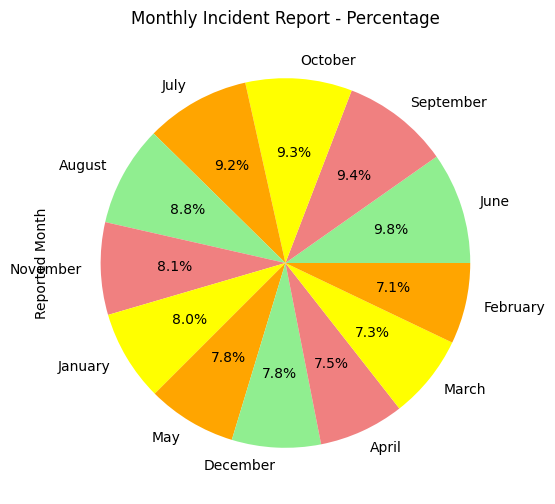

In [17]:
#Setting the figure size
plt.figure(figsize=(6, 6))

#Plotting a incident pie chart based on the month they occured in
clean_data['Reported Month'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral','yellow','orange'])
plt.title('Monthly Incident Report - Percentage')
plt.show()

###**Plot Analysis**
As we can see in the pie chart above, all time high incidents were recorded in the month of June, followed by month of September and October over the years. The least number of incidents were recorded in the month of February over the years.

###**Plotting Gender Distribution Involved in the Incidents**

In [18]:
#Setting the figure size
plt.figure(figsize=(6, 6))

#Creating a new dataframe that has different genders and theie count
gender_count = clean_data[['Number of Females', 'Number of Males', 'Number of Children']].sum().reset_index()

#Renaming the columns of gender count dataframe
gender_count = gender_count.rename(columns={'index': 'Gender', 0: 'Count'})

fig_gender = px.bar(gender_count, x='Gender', y='Count', labels={'x': 'Gender', 'y': 'Count'}, title='Missing Migrants Gender Distribution')
fig_gender.show()

<Figure size 600x600 with 0 Axes>

###**Plot Analysis**
As per the plot, amoung all the migrant incidents that had occured, men were involved the most followed by women whereas children were the least involved amoung all the incidents.

###**Plotting Migration Route Taken**

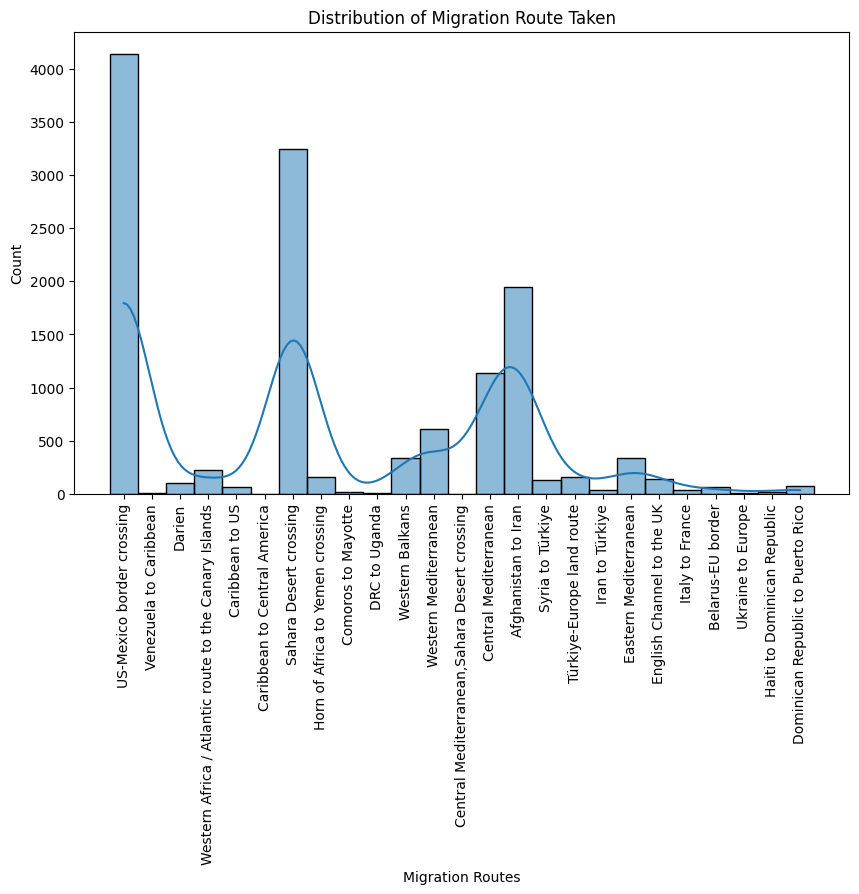

In [19]:
# Distribution of Different Migration Routes taken by migrants over time
plt.figure(figsize=(10, 6))
sns.histplot(clean_data['Migration route'], kde=True)
plt.title('Distribution of Migration Route Taken')
plt.xlabel('Migration Routes')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

###**Plot Analysis**
As we can see from the chart above, there were 4 most popular migration route amoung all the routes where migrant incidents happend, including US-Mexico border crossing, Sahara Dessert Crossing, Afganistan to Iran and central Mediterranean.